<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [32]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite


--2025-07-31 20:20:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: 'survey-data.sqlite'

     0K .......... .......... .......... .......... ..........  0% 1.48M 2m16s
    50K .......... .......... .......... .......... ..........  0% 3.30M 99s
   100K .......... .......... .......... .......... ..........  0% 2.56M 92s
   150K .......... .......... .......... .......... ..........  0% 8.27M 75s
   200K .......... .......... .......... .......... ..........  0% 3.30M 72s
   250K .......... ..

#### Install the required libraries and import them


In [33]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [34]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [38]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


**Demo 2: List all tables**


In [39]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [40]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [41]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load CompTotal as numeric values
df = pd.read_sql_query("SELECT CompTotal FROM main", conn)
conn.close()

# Convert to numeric and drop nulls
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])


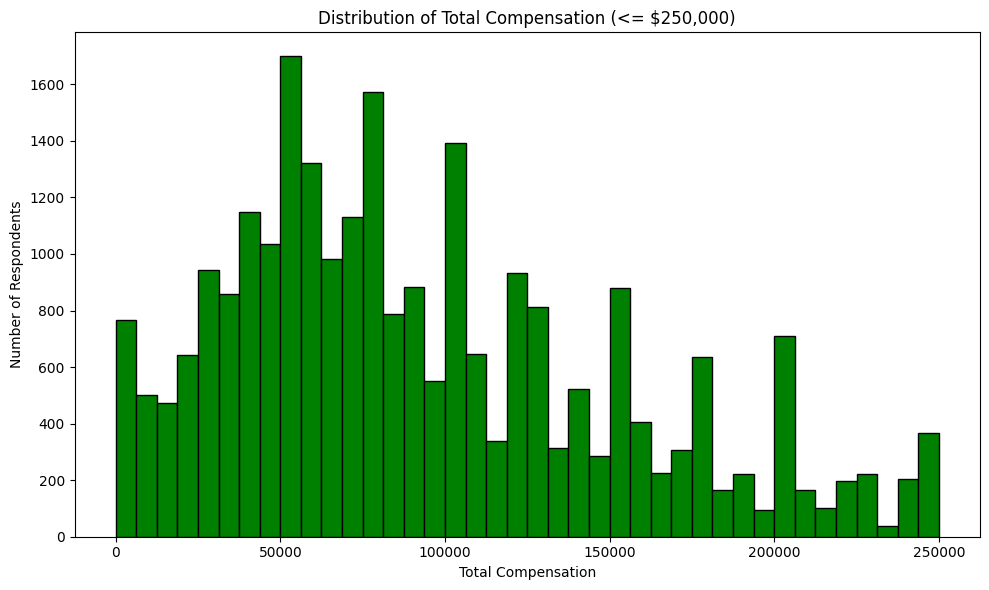

In [42]:
df_filtered = df[df['CompTotal'] <= 250000]

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=40, color='green', edgecolor='black')
plt.title('Distribution of Total Compensation (<= $250,000)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [43]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# Load YearsCodePro
df = pd.read_sql_query("SELECT YearsCodePro FROM main", conn)
conn.close()

# Convert YearsCodePro to numeric (handling values like 'Less than 1 year' and 'More than 50 years')
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df = df.dropna(subset=['YearsCodePro'])


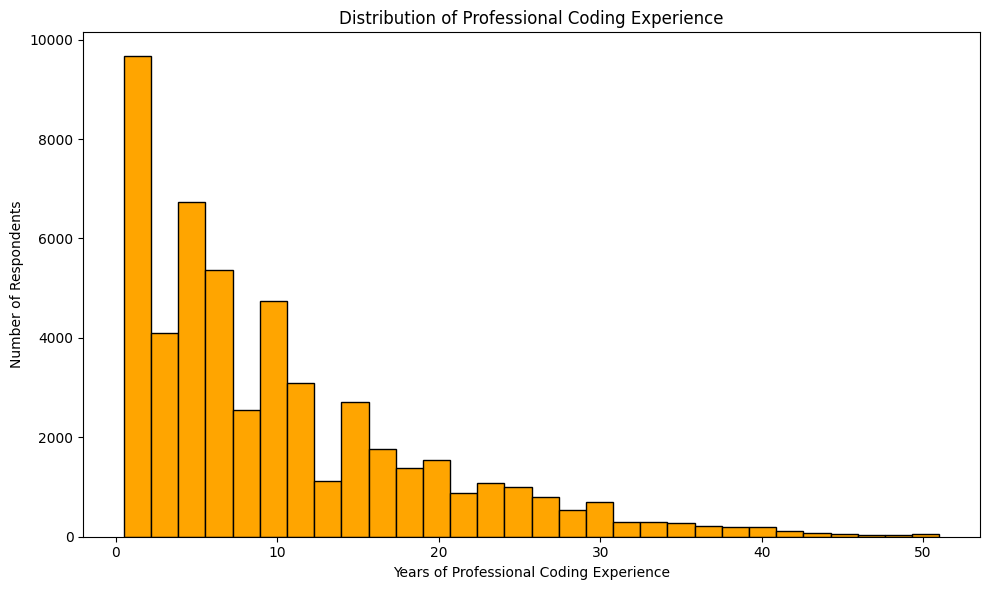

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [45]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# Load Age and CompTotal
df = pd.read_sql_query("SELECT Age, CompTotal FROM main", conn)
conn.close()

# Map Age groups to simplify analysis
age_map = {
    'Under 18 years old': '<18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Prefer not to say': None
}
df['AgeGroup'] = df['Age'].map(age_map)

# Clean and filter compensation data
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['AgeGroup', 'CompTotal'])

# Optionally cap outliers (e.g., <= 250k)
df = df[df['CompTotal'] <= 250000]


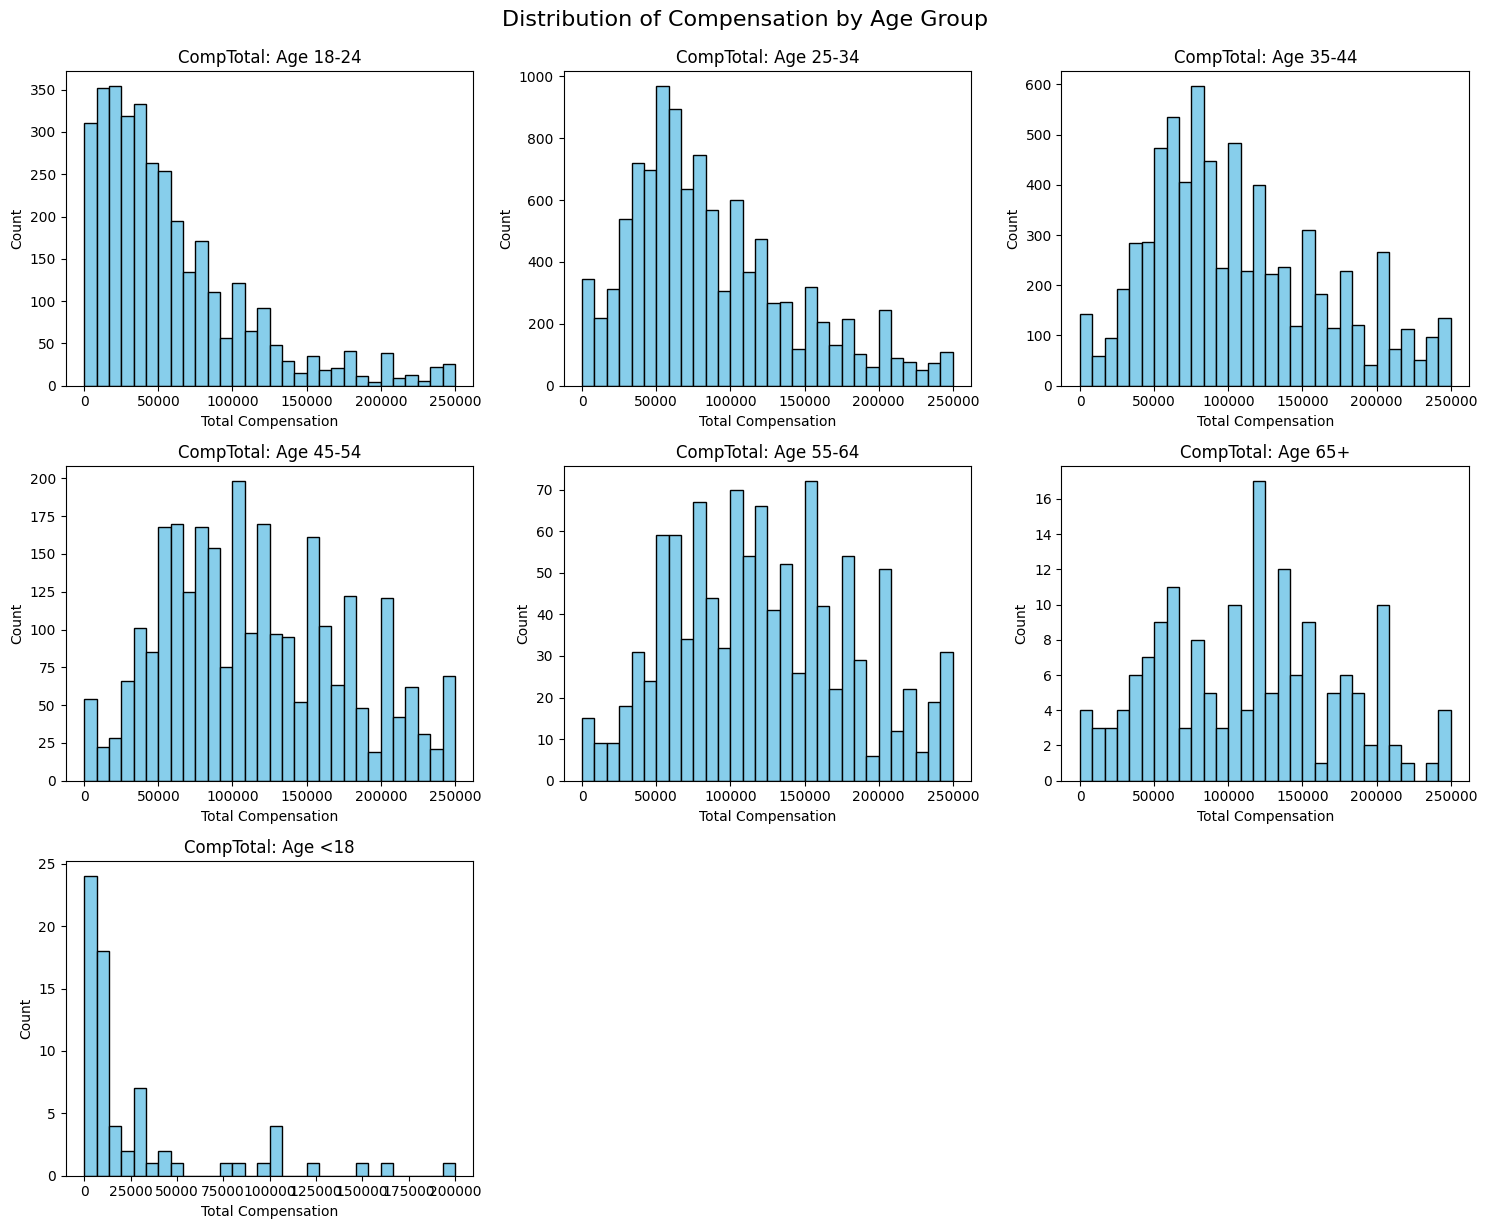

In [46]:
age_groups = df['AgeGroup'].unique()
age_groups = [group for group in age_groups if group is not None]

# Set up subplots
plt.figure(figsize=(15, 12))
for i, group in enumerate(sorted(age_groups), 1):
    plt.subplot(3, 3, i)
    subset = df[df['AgeGroup'] == group]
    plt.hist(subset['CompTotal'], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'CompTotal: Age {group}')
    plt.xlabel('Total Compensation')
    plt.ylabel('Count')

plt.tight_layout()
plt.suptitle('Distribution of Compensation by Age Group', fontsize=16, y=1.02)
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


C:\Users\beall\AppData\Local\Temp\ipykernel_17720\1771255237.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TimeSearchingNum'] = df['TimeSearching'].replace(time_map)


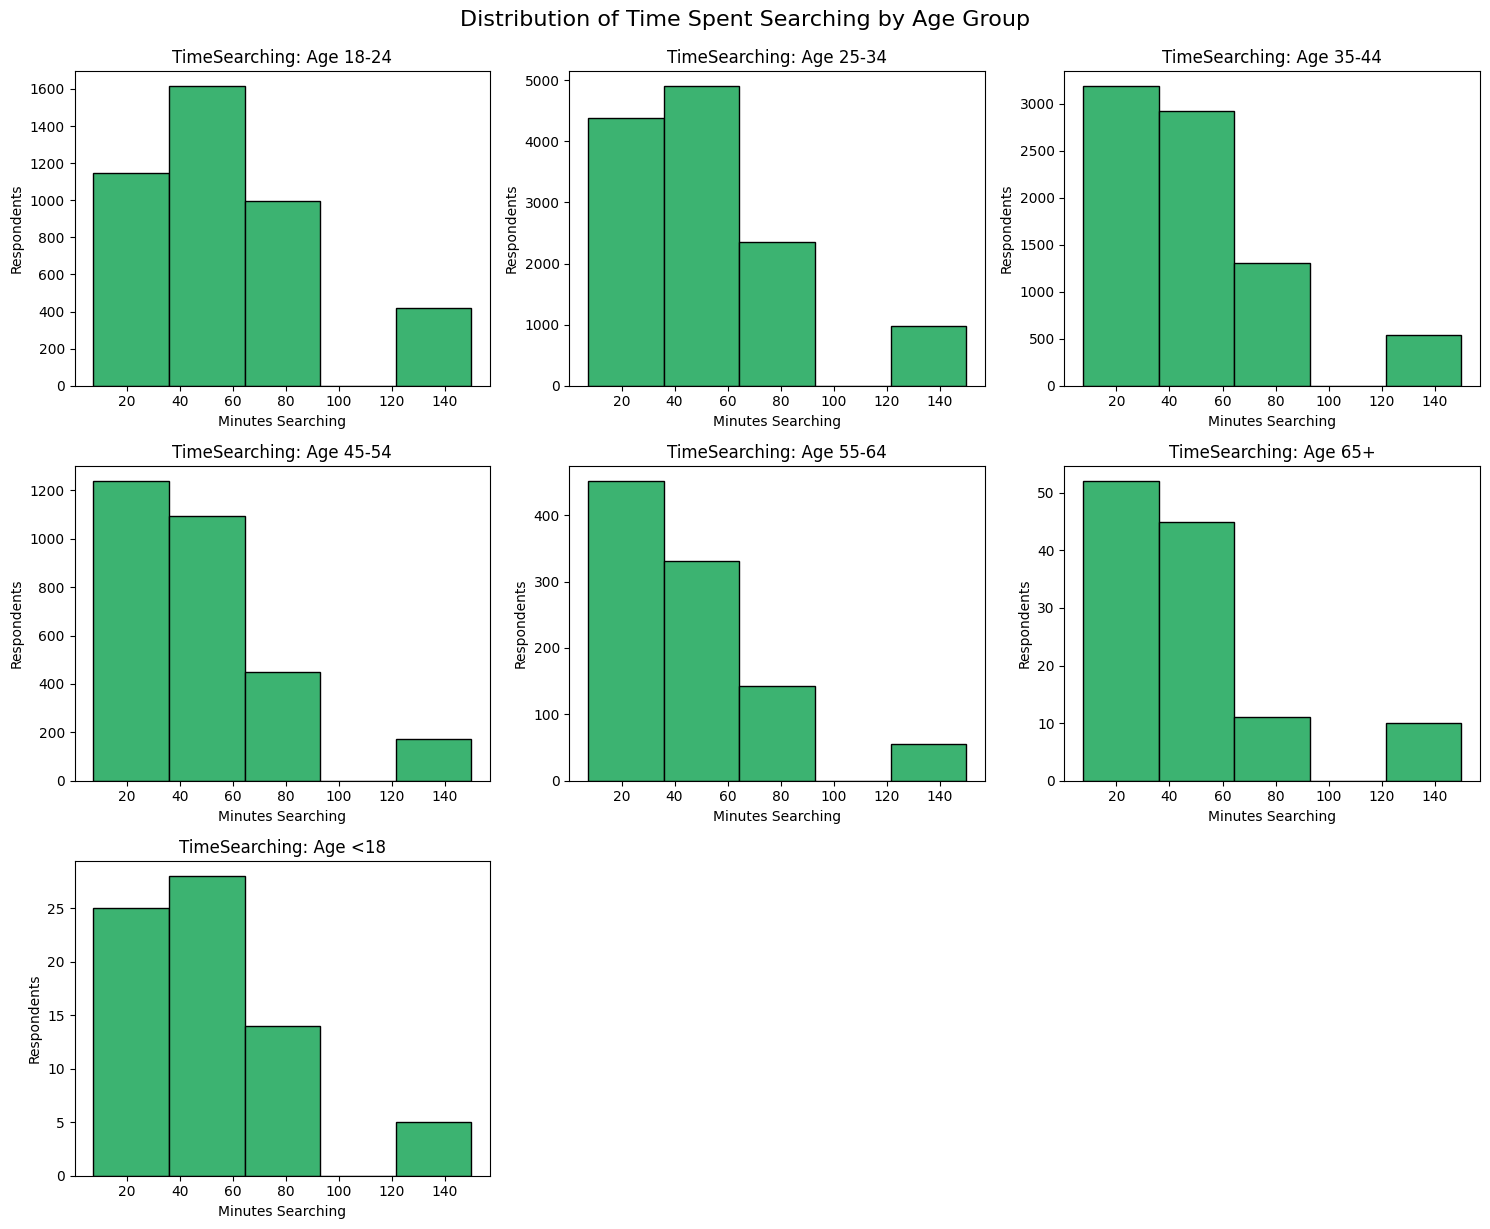

In [57]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect and load
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT Age, TimeSearching FROM main", conn)
conn.close()

# Age group mapping
age_map = {
    'Under 18 years old': '<18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Prefer not to say': None
}
df['AgeGroup'] = df['Age'].map(age_map)

# Map TimeSearching categories to numeric estimates
time_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}
df['TimeSearchingNum'] = df['TimeSearching'].replace(time_map)

# Drop missing
df = df.dropna(subset=['AgeGroup', 'TimeSearchingNum'])

# Plot
age_groups = sorted(df['AgeGroup'].unique())
plt.figure(figsize=(15, 12))

for i, group in enumerate(age_groups, 1):
    subset = df[df['AgeGroup'] == group]
    plt.subplot(3, 3, i)
    plt.hist(subset['TimeSearchingNum'], bins=5, color='mediumseagreen', edgecolor='black')
    plt.title(f'TimeSearching: Age {group}')
    plt.xlabel('Minutes Searching')
    plt.ylabel('Respondents')

plt.tight_layout()
plt.suptitle('Distribution of Time Spent Searching by Age Group', fontsize=16, y=1.02)
plt.show()


In [23]:
print(df.columns)



Index(['Age', 'TimeSearching', 'AgeGroup'], dtype='object')


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


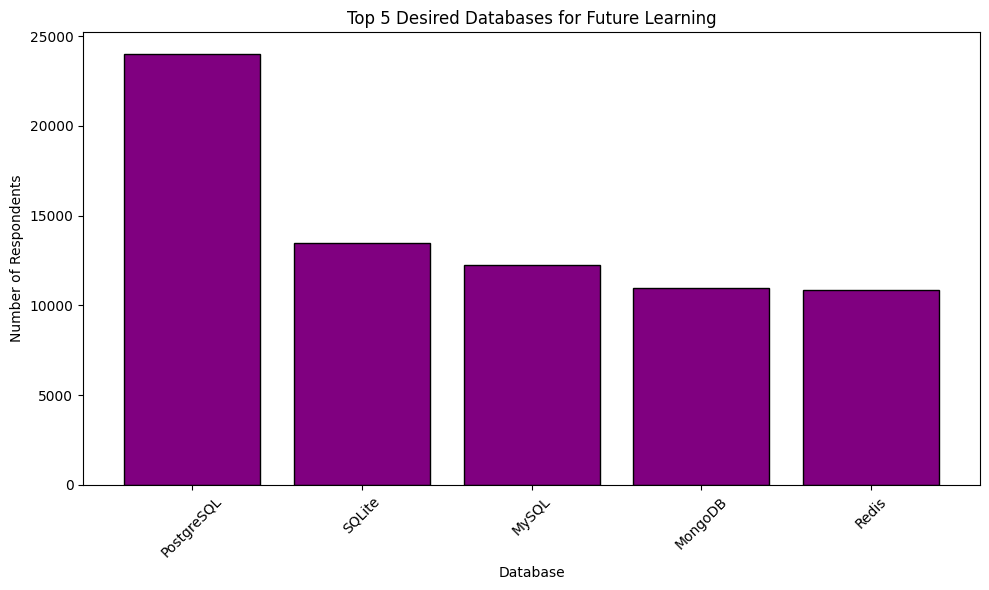

In [64]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite and load the correct column
conn = sqlite3.connect('survey-data.sqlite')
df_raw = pd.read_sql_query("""
    SELECT DatabaseWantToWorkWith 
    FROM main 
    WHERE DatabaseWantToWorkWith IS NOT NULL
""", conn)
conn.close()

# Handle multiple database selections (semicolon-separated)
df_split = df_raw['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_split.explode().str.strip()

# Count and get top 5
df_top5 = df_exploded.value_counts().head(5).reset_index()
df_top5.columns = ['Database', 'Count']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df_top5['Database'], df_top5['Count'], color='purple', edgecolor='black')
plt.title('Top 5 Desired Databases for Future Learning')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [65]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# Load RemoteWork column
df = pd.read_sql_query("SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL", conn)
conn.close()


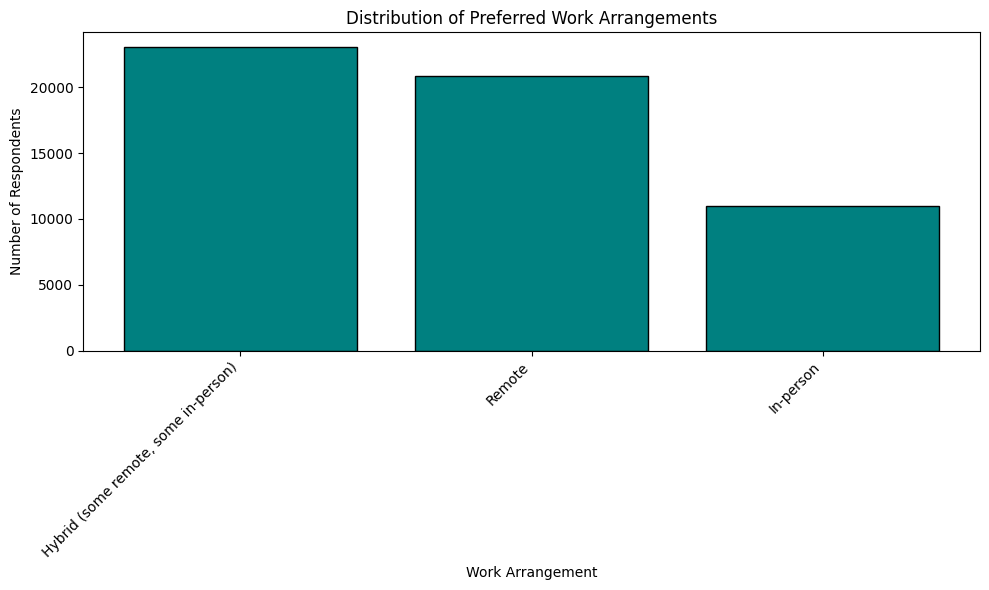

In [66]:
# Count the number of respondents per work arrangement
remote_counts = df['RemoteWork'].value_counts().reset_index()
remote_counts.columns = ['RemoteWork', 'Count']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(remote_counts['RemoteWork'], remote_counts['Count'], color='teal', edgecolor='black')
plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [69]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect and load Age + CompTotal
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT Age, CompTotal FROM main", conn)
conn.close()

# Map Age to numeric midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_map)

# Clean CompTotal
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['AgeNumeric', 'CompTotal'])

# Filter age between 45 and 60
mid_career_df = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]
mid_career_df = mid_career_df[mid_career_df['CompTotal'] <= 250000]


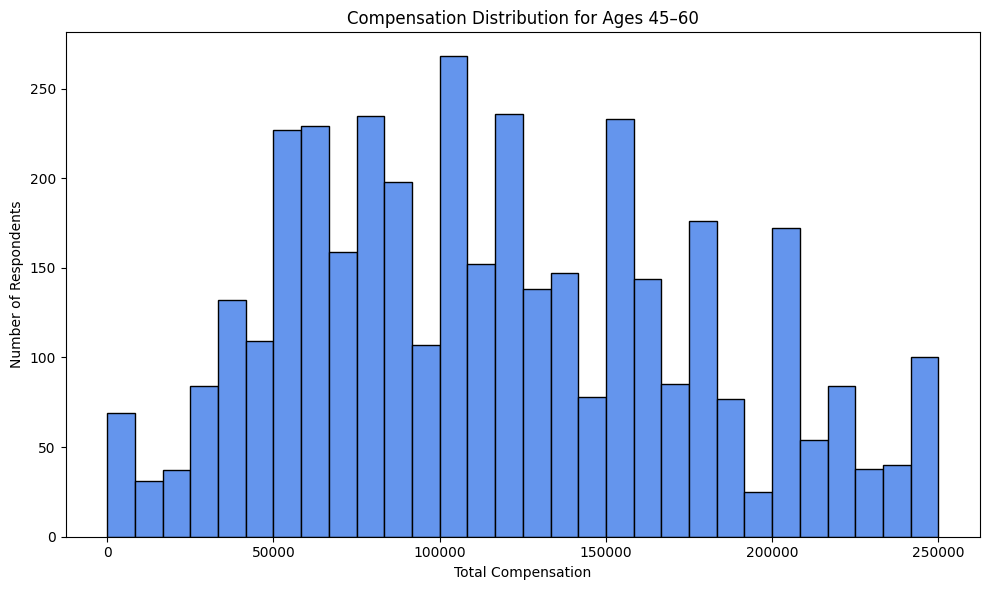

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(mid_career_df['CompTotal'], bins=30, color='cornflowerblue', edgecolor='black')
plt.title('Compensation Distribution for Ages 45–60')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [71]:
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT YearsCodePro, JobSat FROM main", conn)
conn.close()

In [74]:
# Clean YearsCodePro (convert ranges to midpoints)
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Optionally simplify JobSat for visualization
df['JobSat'] = df['JobSat'].astype(str).str.strip()


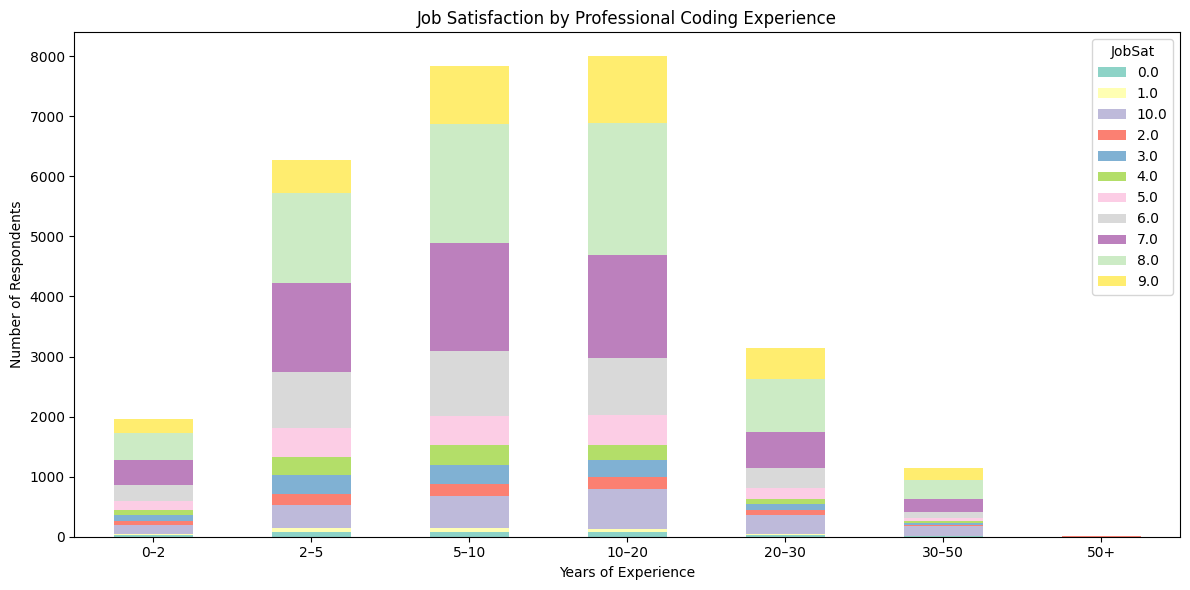

In [75]:
# Bin YearsCodePro into groups
bins = [0, 2, 5, 10, 20, 30, 50, 60]
labels = ['0–2', '2–5', '5–10', '10–20', '20–30', '30–50', '50+']
df['ExpGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Cross-tabulate JobSat by experience group
job_sat_counts = pd.crosstab(df['ExpGroup'], df['JobSat'])

# Plot as stacked histogram (bar chart)
job_sat_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Job Satisfaction by Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [76]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
